# The Sparks Foundation

## Data Science and Business Analytics (GRIP June21)

## Task 3 : Exploratory Data Analysis - Retail

## Author : Saloni Thete

***Problem Statement: In This task We Perform ‘Exploratory Data Analysis’ on dataset "SampleSuperstore" and try to find out the weak areas where you can work to make more profit.***

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('D:\saloni\SampleSuperstore.csv')
print("Dataset is Loaded")

Dataset is Loaded


In [4]:
#display first 5 rows
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.isnull == True # CHeck for Null Values

False

In [9]:
# checking for duplicate values
data.duplicated().sum()

17

In [10]:
#Delecting Duplicate Values
data.drop_duplicates(inplace=True)

In [11]:
#Finding Unique values From the Given Data
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
col =['Postal Code']
drop = data.drop(columns=col, axis=1,inplace=True)

In [13]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
#sorting the states by their profits in descending order
profit = data.groupby('State').sum()['Profit'].sort_values(ascending=False).reset_index()

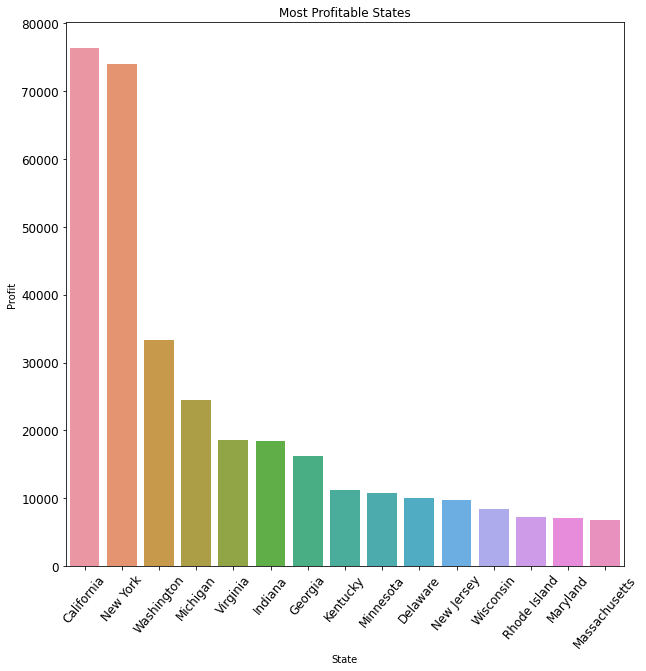

In [17]:
plt.figure(figsize=(10,10))
plt.title('Most Profitable States')
sns.barplot(x = 'State',y = 'Profit', data = profit.head(15)) 
plt.xticks(rotation = 50 , fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

<AxesSubplot:>

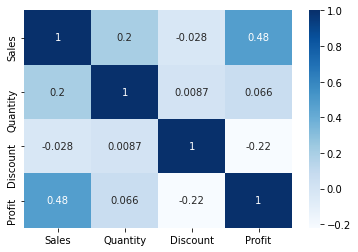

In [20]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="Blues")

### Profit Vs Discount

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

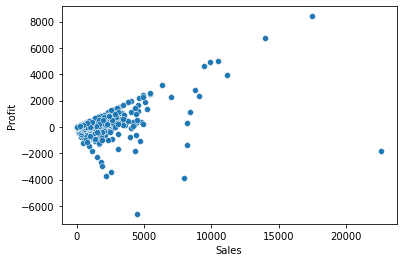

In [42]:
sns.scatterplot(x="Sales", y="Profit", data=data)

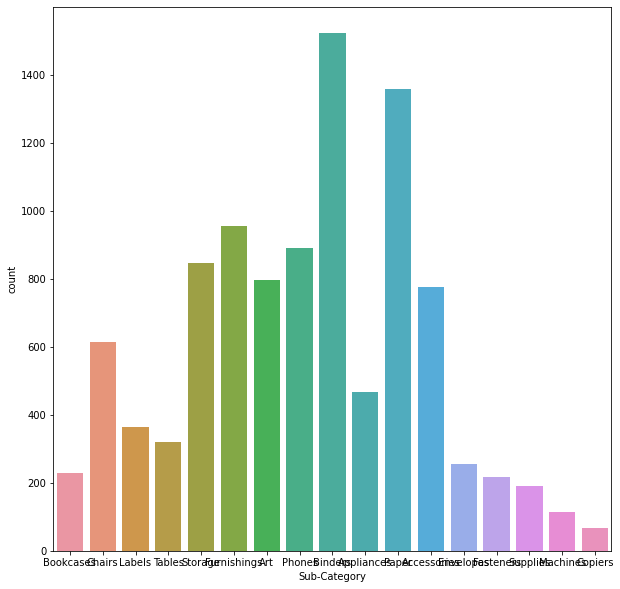

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Sub-Category'])
plt.show()

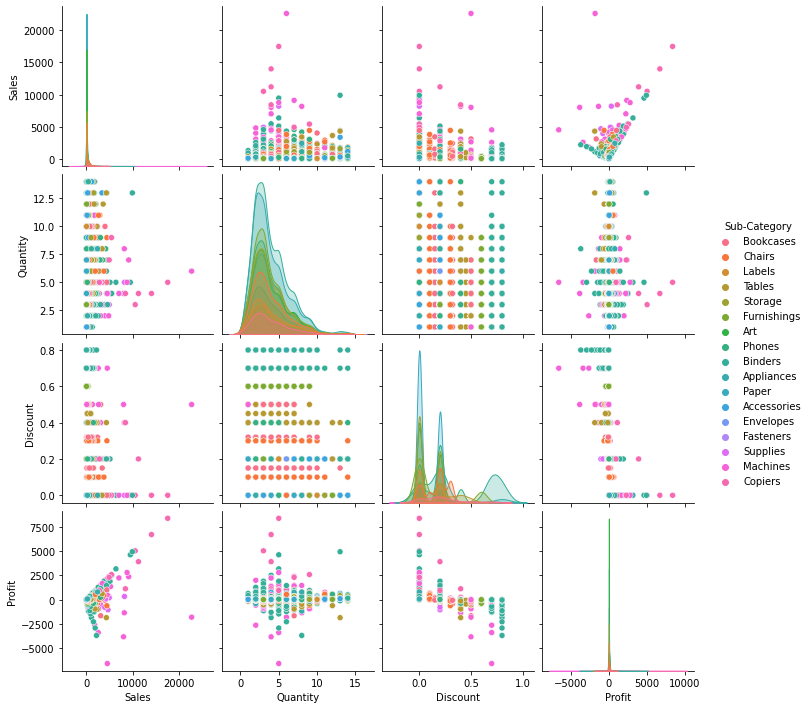

In [29]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')
plt.show()

<AxesSubplot:ylabel='Sales'>

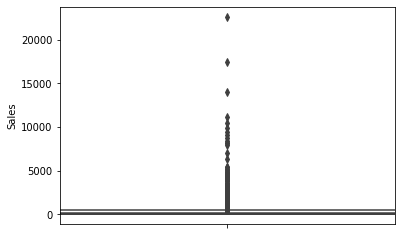

In [30]:
sns.boxplot(y='Sales',data=data,width = 4)

### Sales Vs Profit

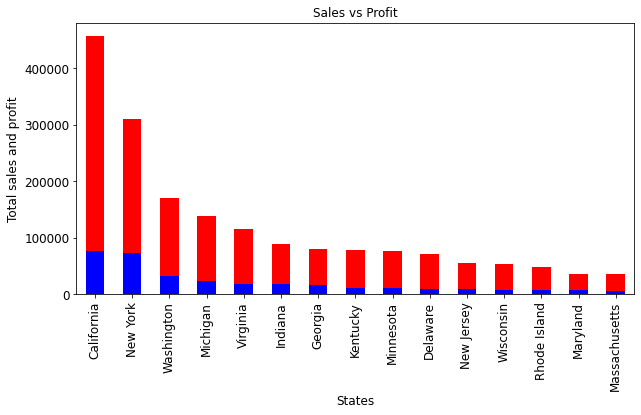

In [32]:
Sales = data.groupby('State').sum()['Sales'].nlargest(n=15) #top 15 states with highest sales
Profits = data.groupby('State').sum()['Profit'].nlargest(n=15) #top 15 states with highest sales

Sales.plot(kind='bar', figsize=(10,5),fontsize = 12, color = 'Red')
Profits.plot(kind='bar', figsize=(10,5),fontsize = 12 , color='Blue')
plt.xlabel('States',fontsize = 12)
plt.ylabel('Total sales and profit',fontsize = 12)
plt.title("Sales vs Profit",fontsize = 12)
plt.show()

In [37]:
(data['Category'].value_counts()/len(data['Category']))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:>

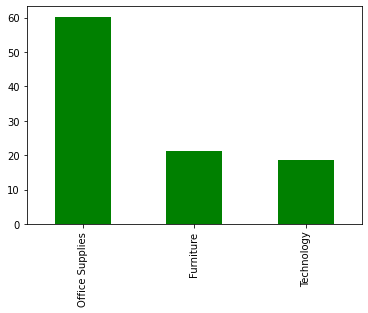

In [39]:
((data['Category'].value_counts()/len(data['Category']))*100).plot(kind = 'bar', color = 'green')

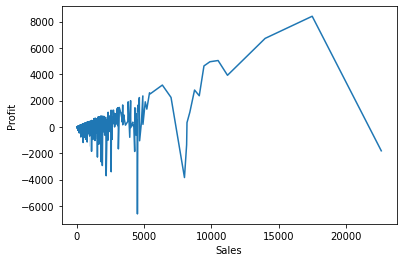

In [43]:
sns.lineplot(x='Sales',y='Profit',data = data)
plt.show()

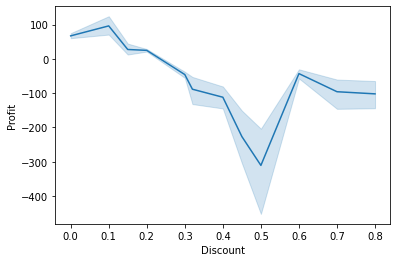

In [44]:
sns.lineplot(x='Discount',y='Profit',data = data)
plt.show()

##### we conclude that, Product sales increases with increase in Discounts but Profit decreases

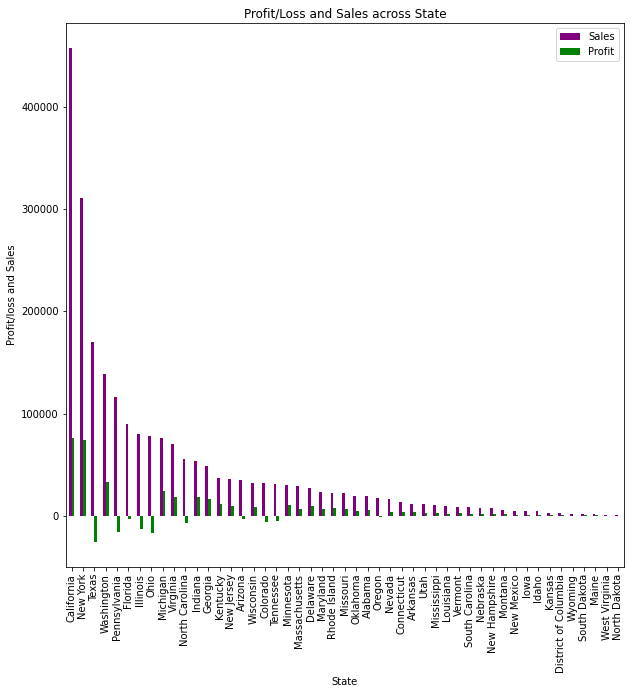

In [46]:
ps=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['Purple','Green'],figsize=(10,10))
plt.title('Profit/Loss and Sales across State')
plt.xlabel('State')
plt.ylabel('Profit/loss and Sales')
plt.show()

In [48]:
states=data['State'].value_counts().nlargest(5)
states

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

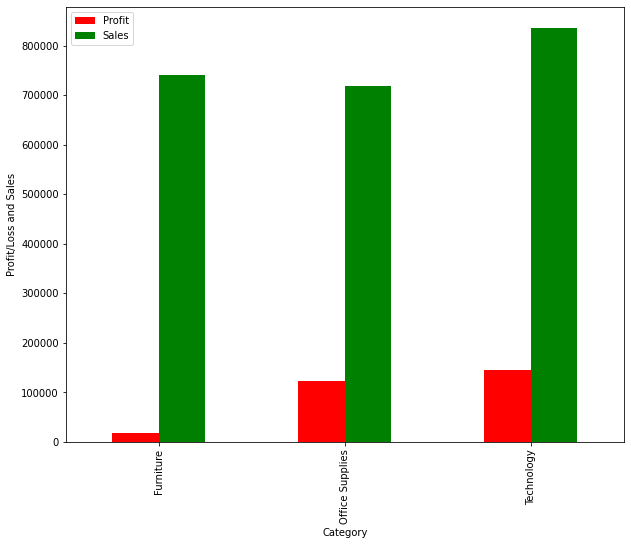

In [49]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['Red','Green'],figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Thank You!!